#### Sr. Engineer: Dhruv Singh <br> Project Name: Success Classifier <br> Phase: Modelling <br> Date Updated: 01/17/2022

## Regression Models: Logistic regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Logistic regression on the DOES dataset

In [4]:
time_cols = ['ActualstartDate', 'ActualEndDate']
does_training = pd.read_csv('1_readonly/Services.csv', parse_dates = time_cols)

In [5]:
print(does_training.head())

   StateId                                   ProgramTitle  Age_AtReg  \
0       20  Transitional Employment Program (Way to Work)         40   
1       20  Transitional Employment Program (Way to Work)         40   
2       34                      DC Infrastructure Academy         50   
3       34  Transitional Employment Program (Way to Work)         50   
4       58         Title I - Workforce Development (WIOA)         53   

   Disability  Gender  CitizenStatus  EducationLevel  Race_Hispanic  \
0           0       1              1              11              0   
1           0       1              1              11              0   
2           0       1              1              14              0   
3           0       1              1              14              0   
4           0       1              1              14              0   

   Race_NativeAmerican  Race_Asian  ...  Race_White  ActualstartDate  \
0                    0           0  ...           0       2018-03-23

In [6]:
does_training.dtypes

StateId                          int64
ProgramTitle                    object
Age_AtReg                        int64
Disability                       int64
Gender                           int64
CitizenStatus                    int64
EducationLevel                   int64
Race_Hispanic                    int64
Race_NativeAmerican              int64
Race_Asian                       int64
Race_AfricanAmerican             int64
Race_PacificIslander             int64
Race_White                       int64
ActualstartDate         datetime64[ns]
ActualEndDate           datetime64[ns]
EmpName                         object
Employed                         int64
Length                           int64
StartMonth                       int64
StartYear                        int64
EndMonth                         int64
EndYear                          int64
dtype: object

In [7]:
does_training.columns

Index(['StateId', 'ProgramTitle', 'Age_AtReg', 'Disability', 'Gender',
       'CitizenStatus', 'EducationLevel', 'Race_Hispanic',
       'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican',
       'Race_PacificIslander', 'Race_White', 'ActualstartDate',
       'ActualEndDate', 'EmpName', 'Employed', 'Length', 'StartMonth',
       'StartYear', 'EndMonth', 'EndYear'],
      dtype='object')

In [8]:
does_training = does_training[['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel', 'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian', 'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White', 'Employed']]

In [9]:
does_training.columns

Index(['Age_AtReg', 'Disability', 'Gender', 'CitizenStatus', 'EducationLevel',
       'Race_Hispanic', 'Race_NativeAmerican', 'Race_Asian',
       'Race_AfricanAmerican', 'Race_PacificIslander', 'Race_White',
       'Employed'],
      dtype='object')

In [10]:
# saving out a copy of the dataset
does_training.to_csv('2_data/services_cleaned.csv')

In [11]:
print(does_training.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38263 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age_AtReg             38263 non-null  int64
 1   Disability            38263 non-null  int64
 2   Gender                38263 non-null  int64
 3   CitizenStatus         38263 non-null  int64
 4   EducationLevel        38263 non-null  int64
 5   Race_Hispanic         38263 non-null  int64
 6   Race_NativeAmerican   38263 non-null  int64
 7   Race_Asian            38263 non-null  int64
 8   Race_AfricanAmerican  38263 non-null  int64
 9   Race_PacificIslander  38263 non-null  int64
 10  Race_White            38263 non-null  int64
 11  Employed              38263 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB
None


##### VARIABLE DESCRIPTIONS


Race variables:

	1: Yes
	0: No
	9: Prefer not to disclose


Gender: 

	1: Male
	2: Female
	9: Prefer not to disclose

Citizenship:

	1: Citizen of U.S. or Territory
	2: US Permanent Resident
	3: Alien/Refugee Lawfully Admitted to US
	4: None of the Above

Education Level:

	0: No schooling
	1: 1st Grade
	2: 2nd Grade
	3: 3rd Grade
	4: 4th Grade
	5: 5th Grade
	6: 6th Grade
	7: 7th Grade
	8: 8th Grade
	9: 9th Grade
	10: 10th Grade
	11: 11th grade
	12: 12th grade no Diploma
	13: Attained GED or Equivalent
	14: Attained High School Diploma
	15: HS Grad and 1 year of College or a Technical or Vocational School
	16: HS Grad and 2 years of College or a Technical or Vocational School
	17: HS Grad and 3 years of College or a Technical or Vocational School
	18: Attained a postsecondary technical or vocational certificate (non-degree)
	19: Associate’s Degree
	20: Bachelor’s Degree or equivalent
	21: Attained degree beyond a Bachelor’s degree

### Checking that your target variable is binary

<AxesSubplot:xlabel='Employed', ylabel='count'>

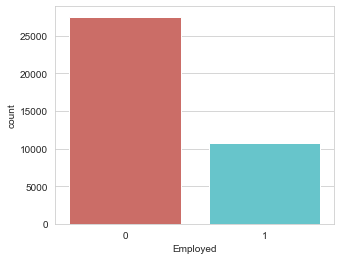

In [12]:
sb.countplot(x='Employed', data=does_training, palette='hls')

### Checking for missing values

In [13]:
does_training.isnull().sum()

Age_AtReg               0
Disability              0
Gender                  0
CitizenStatus           0
EducationLevel          0
Race_Hispanic           0
Race_NativeAmerican     0
Race_Asian              0
Race_AfricanAmerican    0
Race_PacificIslander    0
Race_White              0
Employed                0
dtype: int64

In [14]:
does_training.describe()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
count,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000,38263.000000
mean,35.537647,0.043515,1.450226,1.047409,14.735201,0.017693,0.014740,0.004757,0.867731,0.002091,0.026945,0.280950
std,13.070649,0.204015,0.499410,0.298709,3.630815,0.131836,0.120512,0.068804,0.338787,0.045678,0.161925,0.449469
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.000000,1.000000,14.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,47.000000,0.000000,2.000000,1.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,83.000000,1.000000,2.000000,4.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
does_training.head()

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
0,40,0,1,1,11,0,0,0,0,0,0,1
1,40,0,1,1,11,0,0,0,0,0,0,1
2,50,0,1,1,14,0,0,0,1,0,0,0
3,50,0,1,1,14,0,0,0,1,0,0,0
4,53,0,1,1,14,0,0,0,1,0,0,0


### Imputing missing values

<AxesSubplot:xlabel='Gender', ylabel='Age_AtReg'>

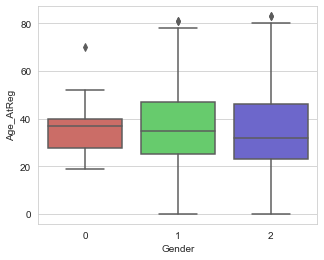

In [16]:
sb.boxplot(x='Gender', y='Age_AtReg', data=does_training, palette='hls')

In [17]:
Gender_groups = does_training.groupby(does_training['Gender'])
Gender_groups.mean()

,Age_AtReg,Disability,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
Gender,,,,,,,,,,,
0,35.000000,0.083333,1.277778,16.833333,0.111111,0.111111,0.000000,0.305556,0.000000,0.027778,0.166667
1,36.052662,0.047176,1.048178,14.361286,0.015884,0.013165,0.004102,0.881320,0.001908,0.024948,0.264501
2,34.913341,0.038985,1.045994,15.184904,0.019695,0.016451,0.005561,0.852401,0.002317,0.029369,0.301164


### Checking for independence between features

<AxesSubplot:>

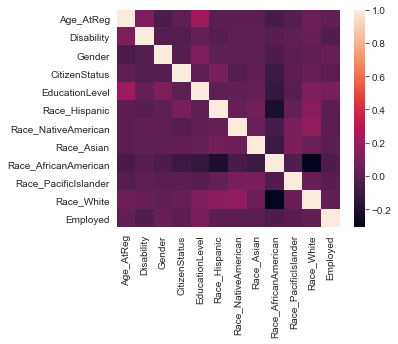

In [18]:
sb.heatmap(does_training.corr())

### Checking that your dataset size is sufficient

In [19]:
does_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38263 entries, 0 to 38262
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age_AtReg             38263 non-null  int64
 1   Disability            38263 non-null  int64
 2   Gender                38263 non-null  int64
 3   CitizenStatus         38263 non-null  int64
 4   EducationLevel        38263 non-null  int64
 5   Race_Hispanic         38263 non-null  int64
 6   Race_NativeAmerican   38263 non-null  int64
 7   Race_Asian            38263 non-null  int64
 8   Race_AfricanAmerican  38263 non-null  int64
 9   Race_PacificIslander  38263 non-null  int64
 10  Race_White            38263 non-null  int64
 11  Employed              38263 non-null  int64
dtypes: int64(12)
memory usage: 3.5 MB


In [20]:
X_train, X_test, y_train, y_test = train_test_split(does_training.drop('Employed', axis=1),
                                                   does_training['Employed'], test_size=0.2,
                                                   random_state=200)

In [21]:
print(X_train.shape)
print(y_train.shape)

(30610, 11)
(30610,)


In [22]:
X_train[0:5]

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White
16323,55,0,2,1,18,0,0,0,1,0,0
4188,50,0,2,1,14,0,0,0,1,0,0
26785,51,0,1,1,14,0,0,0,1,0,0
10109,27,0,1,1,13,0,0,0,1,0,0
23687,46,0,1,1,13,0,0,0,1,0,0


### Deploying and evaluating the model

In [23]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [24]:
y_pred = LogReg.predict(X_test)

## Model Evaluation
### Classification report without cross-validation

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83      5439
           1       0.00      0.00      0.00      2214

    accuracy                           0.71      7653
   macro avg       0.36      0.50      0.42      7653
weighted avg       0.51      0.71      0.59      7653



C:\Users\drewn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### K-fold cross-validation & confusion matrices

In [26]:
y_train_pred = cross_val_predict(LogReg, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[22074,     0],
       [ 8536,     0]], dtype=int64)

In [27]:
precision_score(y_train, y_train_pred)

C:\Users\drewn\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

### Make a test prediction

In [28]:
does_training[863:864]

,Age_AtReg,Disability,Gender,CitizenStatus,EducationLevel,Race_Hispanic,Race_NativeAmerican,Race_Asian,Race_AfricanAmerican,Race_PacificIslander,Race_White,Employed
863,44,1,1,1,16,0,0,0,1,0,0,0


In [29]:
# test_customer = np.array([29, 0, 1, 1, 20, 0, 0, 1, 0, 0, 0]).reshape(1,-1)
test_customer = np.array([45, 0, 1, 1, 14, 0, 0, 0, 1, 0, 0]).reshape(1,-1)

print(LogReg.predict(test_customer))
print(LogReg.predict_proba(test_customer))

[0]
[[0.74318461 0.25681539]]
